# Set Parameter
- Attention = Luong
- Teacher Forcing Ratio = 0.5
- Layer = 1
- Batch size = 32
- Drop out = 0.2
- Hidden unit = 50
- Epochs = 50
- N = [60, 200, 20]
- Data = 10K
- Deduplication

# Import packages

import useful packages for experiments

In [1]:
import os
import argparse
import logging

import torch
from torch.optim.lr_scheduler import StepLR
import torchtext

from trainer.supervised_trainer import SupervisedTrainer
from models.encoderRNN import EncoderRNN
from models.decoderRNN import DecoderRNN
from models.seq2seq import Seq2seq
from loss.loss import Perplexity
from optim.optim import Optimizer
from dataset import fields
from evaluator.predictor import Predictor

import matplotlib.pyplot as plt

/home/hyeontae/hyeontae/venv/lib/python3.5/site-packages/torch/nn/functional.py:52: UserWarning: size_average and reduce args will be deprecated, please use reduction='elementwise_mean' instead.
  warnings.warn(warning.format(ret))
/home/hyeontae/hyeontae/venv/lib/python3.5/site-packages/torch/nn/functional.py:52: UserWarning: size_average and reduce args will be deprecated, please use reduction='elementwise_mean' instead.
  warnings.warn(warning.format(ret))


# Log format

In [2]:
log_level = 'info'
LOG_FORMAT = '%(asctime)s %(levelname)-6s %(message)s'
logging.basicConfig(format=LOG_FORMAT, level=getattr(logging, log_level.upper()))

In [3]:
N = list(range(60, 201, 20))
character_error_rate = []
sentance_error_rate = []
print(N)

[60, 80, 100, 120, 140, 160, 180, 200]


# Prepare dataset

N : 60


/home/hyeontae/hyeontae/venv/lib/python3.5/site-packages/torch/nn/functional.py:52: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
/home/hyeontae/hyeontae/venv/lib/python3.5/site-packages/torch/nn/modules/rnn.py:38: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  "num_layers={}".format(dropout, num_layers))
2019-02-27 12:13:03,184 INFO   Optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.001
    weight_decay: 0
), Scheduler: None
/home/hyeontae/hyeontae/venv/lib/python3.5/site-packages/torch/nn/functional.py:995: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
2019-02-27 12:13:55,571 INFO   Finished epoch 1: Train loss: 15.1532,

N : 80


2019-02-27 13:01:38,691 INFO   Optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.001
    weight_decay: 0
), Scheduler: None
2019-02-27 13:02:59,073 INFO   Finished epoch 1: Train loss: 18.4873, Dev loss: 14.2907, Accuracy(Character): 0.1296, Accuracy(Word): 0.0000
2019-02-27 13:04:16,674 INFO   Finished epoch 2: Train loss: 14.6517, Dev loss: 13.7621, Accuracy(Character): 0.1380, Accuracy(Word): 0.0000
2019-02-27 13:05:34,495 INFO   Finished epoch 3: Train loss: 13.9973, Dev loss: 51.5517, Accuracy(Character): 0.1191, Accuracy(Word): 0.0000
2019-02-27 13:06:52,127 INFO   Finished epoch 4: Train loss: 17.0201, Dev loss: 15.3280, Accuracy(Character): 0.1371, Accuracy(Word): 0.0000
2019-02-27 13:08:09,752 INFO   Finished epoch 5: Train loss: 13.4433, Dev loss: 16.5132, Accuracy(Character): 0.1601, Accuracy(Word): 0.0000
2019-02-27 13:09:27,708 INFO   Finished epoch 6: Train loss: 11.4941, Dev loss: 10.9240, Accuracy(Character): 0.2432,

N : 100


2019-02-27 14:06:02,090 INFO   Optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.001
    weight_decay: 0
), Scheduler: None
2019-02-27 14:07:29,293 INFO   Finished epoch 1: Train loss: 20.2373, Dev loss: 17.3042, Accuracy(Character): 0.1010, Accuracy(Word): 0.0000
2019-02-27 14:08:59,152 INFO   Finished epoch 2: Train loss: 17.1115, Dev loss: 16.5259, Accuracy(Character): 0.1134, Accuracy(Word): 0.0000
2019-02-27 14:10:32,479 INFO   Finished epoch 3: Train loss: 16.3692, Dev loss: 20.8359, Accuracy(Character): 0.1216, Accuracy(Word): 0.0000
2019-02-27 14:12:02,904 INFO   Finished epoch 4: Train loss: 15.2066, Dev loss: 10.6433, Accuracy(Character): 0.2010, Accuracy(Word): 0.0000
2019-02-27 14:13:35,283 INFO   Finished epoch 5: Train loss: 9.1452, Dev loss: 7.8392, Accuracy(Character): 0.2548, Accuracy(Word): 0.0021
2019-02-27 14:15:06,231 INFO   Finished epoch 6: Train loss: 8.5814, Dev loss: 17.4747, Accuracy(Character): 0.1949, Ac

N : 120


2019-02-27 15:18:01,621 INFO   Optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.001
    weight_decay: 0
), Scheduler: None
2019-02-27 15:19:50,298 INFO   Finished epoch 1: Train loss: 25.0868, Dev loss: 19.2065, Accuracy(Character): 0.0997, Accuracy(Word): 0.0000
2019-02-27 15:21:41,196 INFO   Finished epoch 2: Train loss: 19.1801, Dev loss: 31.7431, Accuracy(Character): 0.0950, Accuracy(Word): 0.0000
2019-02-27 15:23:31,289 INFO   Finished epoch 3: Train loss: 19.8666, Dev loss: 23.8110, Accuracy(Character): 0.1034, Accuracy(Word): 0.0000
2019-02-27 15:25:16,400 INFO   Finished epoch 4: Train loss: 21.0883, Dev loss: 32.0686, Accuracy(Character): 0.1052, Accuracy(Word): 0.0000
2019-02-27 15:27:03,670 INFO   Finished epoch 5: Train loss: 22.0148, Dev loss: 45.7800, Accuracy(Character): 0.1062, Accuracy(Word): 0.0000
2019-02-27 15:28:49,307 INFO   Finished epoch 6: Train loss: 22.6602, Dev loss: 59.6611, Accuracy(Character): 0.1062,

N : 140


2019-02-27 16:49:08,712 INFO   Optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.001
    weight_decay: 0
), Scheduler: None
2019-02-27 16:51:16,169 INFO   Finished epoch 1: Train loss: 25.9531, Dev loss: 22.4577, Accuracy(Character): 0.0848, Accuracy(Word): 0.0000
2019-02-27 16:53:18,287 INFO   Finished epoch 2: Train loss: 19.7315, Dev loss: 20.5442, Accuracy(Character): 0.0946, Accuracy(Word): 0.0000
2019-02-27 16:55:27,596 INFO   Finished epoch 3: Train loss: 19.4413, Dev loss: 23.7053, Accuracy(Character): 0.0905, Accuracy(Word): 0.0000
2019-02-27 16:57:34,103 INFO   Finished epoch 4: Train loss: 20.0659, Dev loss: 23.7342, Accuracy(Character): 0.0989, Accuracy(Word): 0.0000
2019-02-27 16:59:42,039 INFO   Finished epoch 5: Train loss: 17.3908, Dev loss: 20.6081, Accuracy(Character): 0.1024, Accuracy(Word): 0.0000
2019-02-27 17:01:46,625 INFO   Finished epoch 6: Train loss: 17.1198, Dev loss: 28.9977, Accuracy(Character): 0.1089,

N : 160


2019-02-27 18:31:42,259 INFO   Optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.001
    weight_decay: 0
), Scheduler: None
2019-02-27 18:33:51,281 INFO   Finished epoch 1: Train loss: 28.5113, Dev loss: 23.9804, Accuracy(Character): 0.0704, Accuracy(Word): 0.0000
2019-02-27 18:36:15,627 INFO   Finished epoch 2: Train loss: 21.7054, Dev loss: 23.0891, Accuracy(Character): 0.0841, Accuracy(Word): 0.0000
2019-02-27 18:38:27,198 INFO   Finished epoch 3: Train loss: 20.8853, Dev loss: 26.1473, Accuracy(Character): 0.0852, Accuracy(Word): 0.0000
2019-02-27 18:40:39,254 INFO   Finished epoch 4: Train loss: 20.0710, Dev loss: 31.3746, Accuracy(Character): 0.0905, Accuracy(Word): 0.0000
2019-02-27 18:42:50,447 INFO   Finished epoch 5: Train loss: 23.0431, Dev loss: 138.6311, Accuracy(Character): 0.0969, Accuracy(Word): 0.0000
2019-02-27 18:45:06,834 INFO   Finished epoch 6: Train loss: 19.6015, Dev loss: 36.6922, Accuracy(Character): 0.1437

N : 180


2019-02-27 20:22:04,742 INFO   Optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.001
    weight_decay: 0
), Scheduler: None
2019-02-27 20:24:09,705 INFO   Finished epoch 1: Train loss: 31.4207, Dev loss: 26.8323, Accuracy(Character): 0.0587, Accuracy(Word): 0.0000
2019-02-27 20:26:28,150 INFO   Finished epoch 2: Train loss: 24.1192, Dev loss: 25.2568, Accuracy(Character): 0.0799, Accuracy(Word): 0.0000
2019-02-27 20:28:36,986 INFO   Finished epoch 3: Train loss: 23.4145, Dev loss: 51.4182, Accuracy(Character): 0.0660, Accuracy(Word): 0.0000
2019-02-27 20:30:48,430 INFO   Finished epoch 4: Train loss: 26.4155, Dev loss: 30.5833, Accuracy(Character): 0.0768, Accuracy(Word): 0.0000
2019-02-27 20:32:57,075 INFO   Finished epoch 5: Train loss: 23.2523, Dev loss: 35.6246, Accuracy(Character): 0.0874, Accuracy(Word): 0.0000
2019-02-27 20:35:05,526 INFO   Finished epoch 6: Train loss: 22.6302, Dev loss: 46.2261, Accuracy(Character): 0.0841,

N : 200


2019-02-27 21:56:47,843 INFO   Optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.001
    weight_decay: 0
), Scheduler: None
2019-02-27 21:58:39,015 INFO   Finished epoch 1: Train loss: 35.4134, Dev loss: 29.1729, Accuracy(Character): 0.0543, Accuracy(Word): 0.0000
2019-02-27 22:00:22,045 INFO   Finished epoch 2: Train loss: 26.6011, Dev loss: 27.6309, Accuracy(Character): 0.0627, Accuracy(Word): 0.0000
2019-02-27 22:02:04,505 INFO   Finished epoch 3: Train loss: 26.8917, Dev loss: 57.9859, Accuracy(Character): 0.0665, Accuracy(Word): 0.0000
2019-02-27 22:03:47,773 INFO   Finished epoch 4: Train loss: 25.0830, Dev loss: 49.8633, Accuracy(Character): 0.0689, Accuracy(Word): 0.0000
2019-02-27 22:05:31,934 INFO   Finished epoch 5: Train loss: 33.8177, Dev loss: 26.4221, Accuracy(Character): 0.0741, Accuracy(Word): 0.0000
2019-02-27 22:07:11,920 INFO   Finished epoch 6: Train loss: 31.0364, Dev loss: 33.4851, Accuracy(Character): 0.0784,

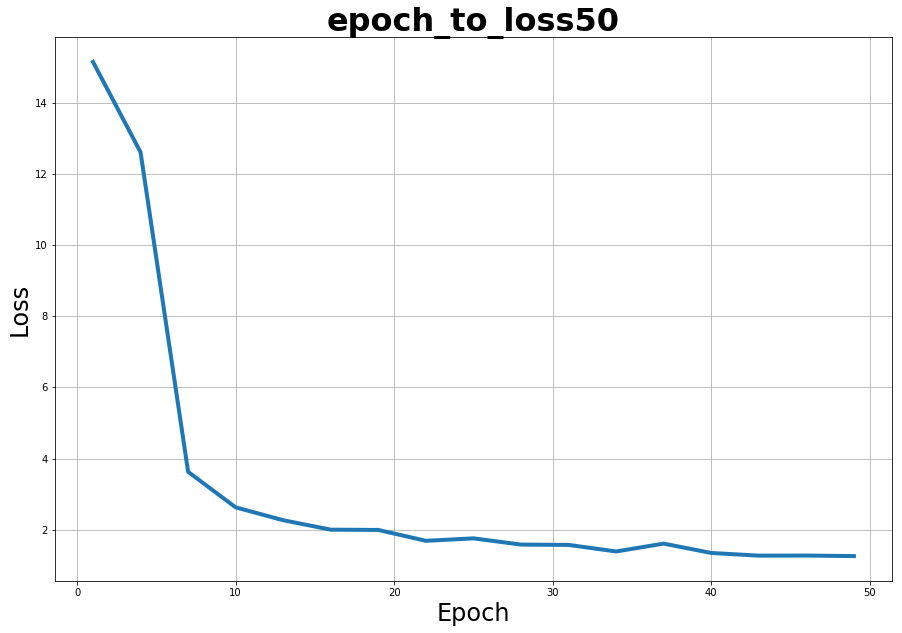

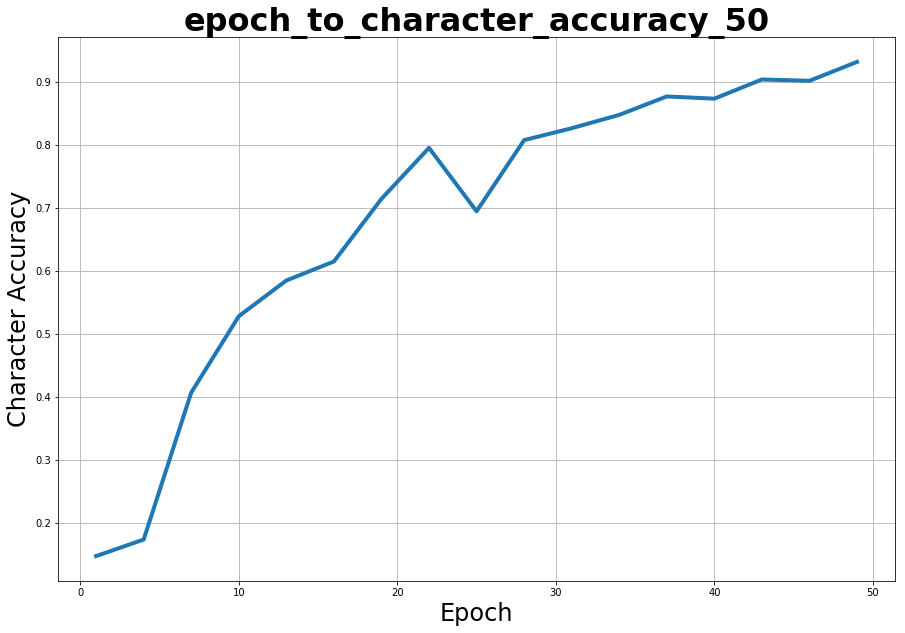

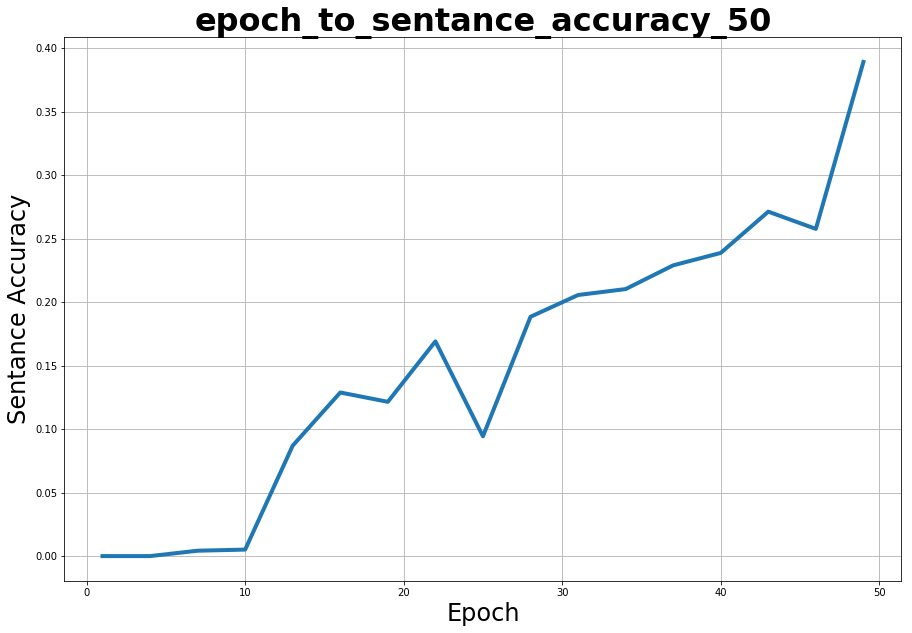

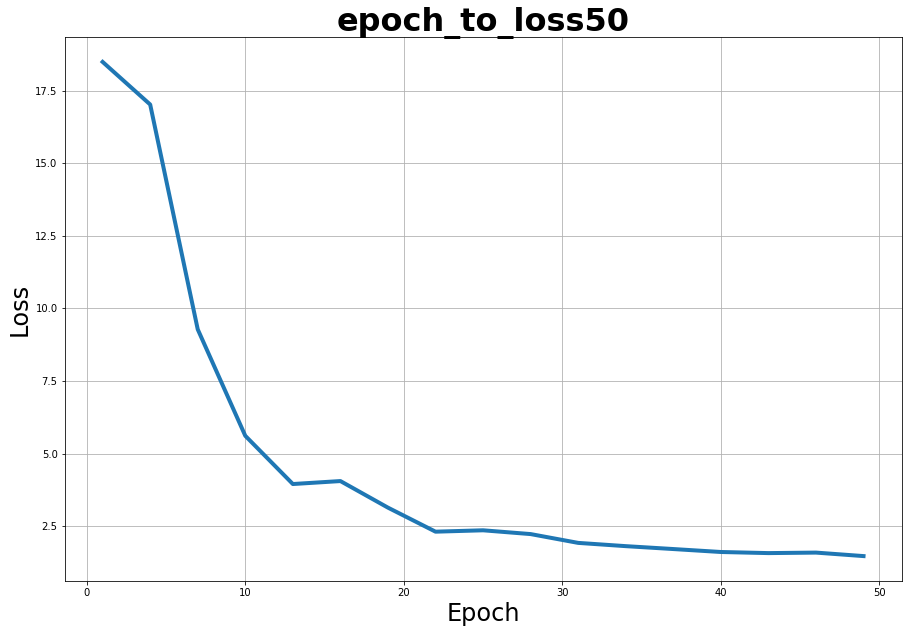

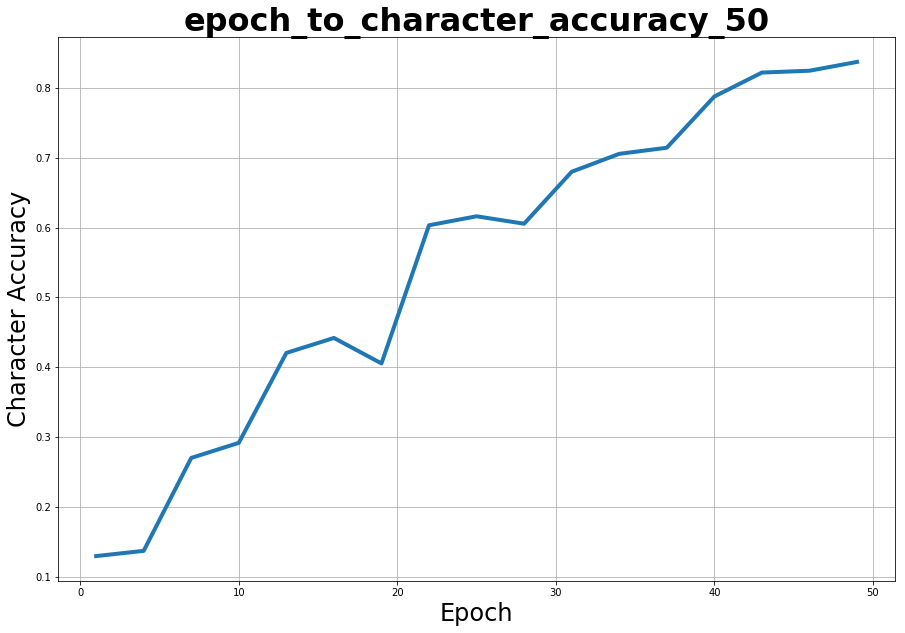

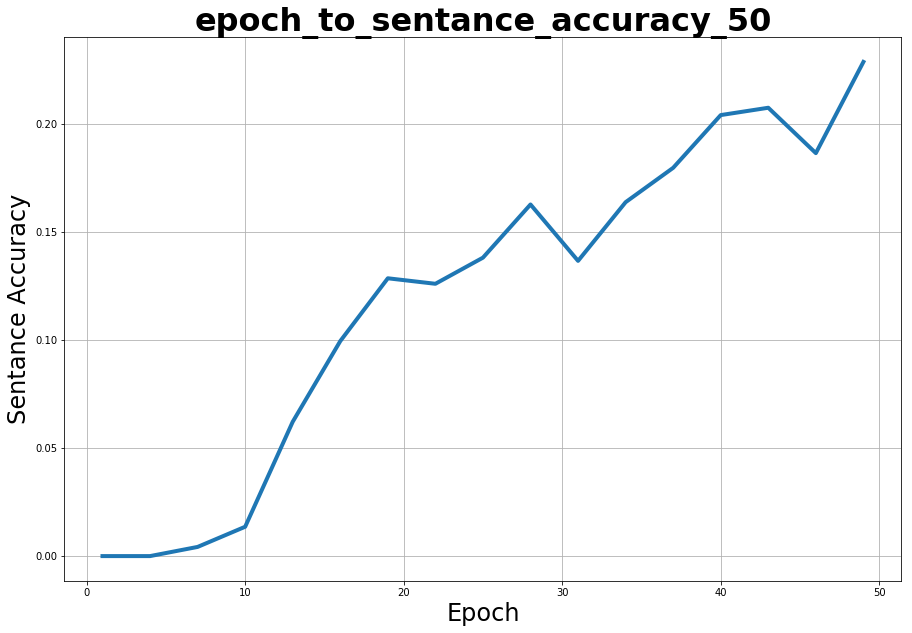

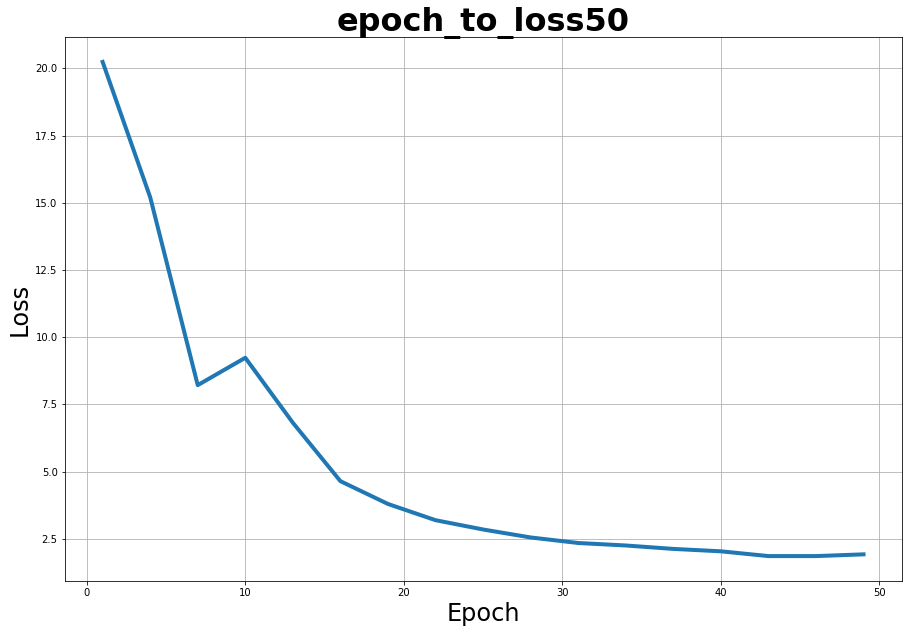

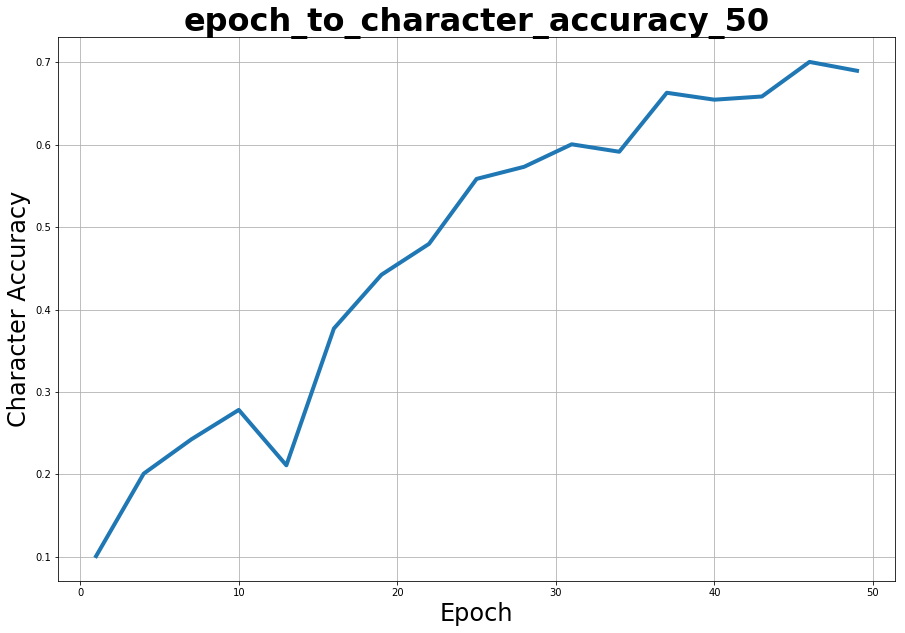

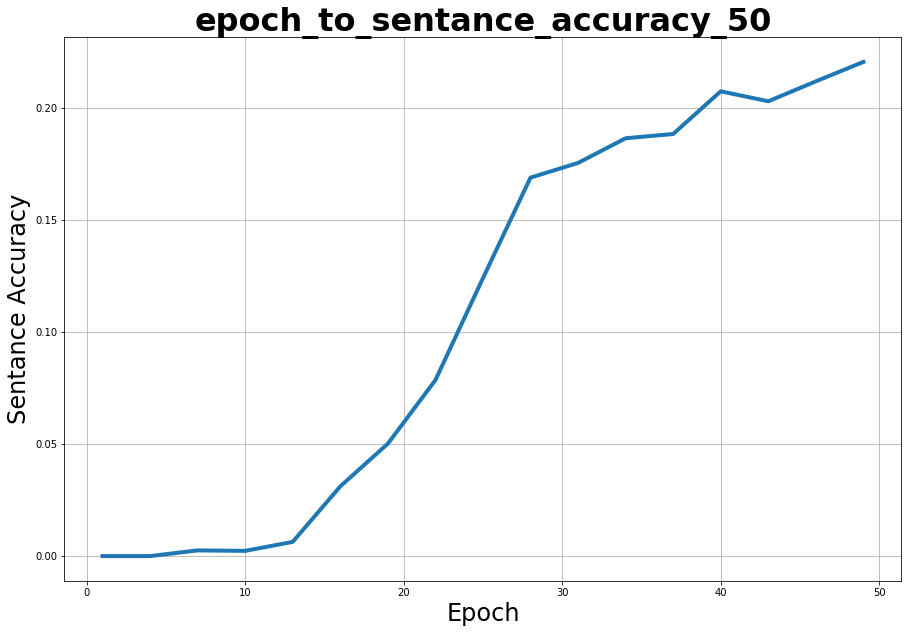

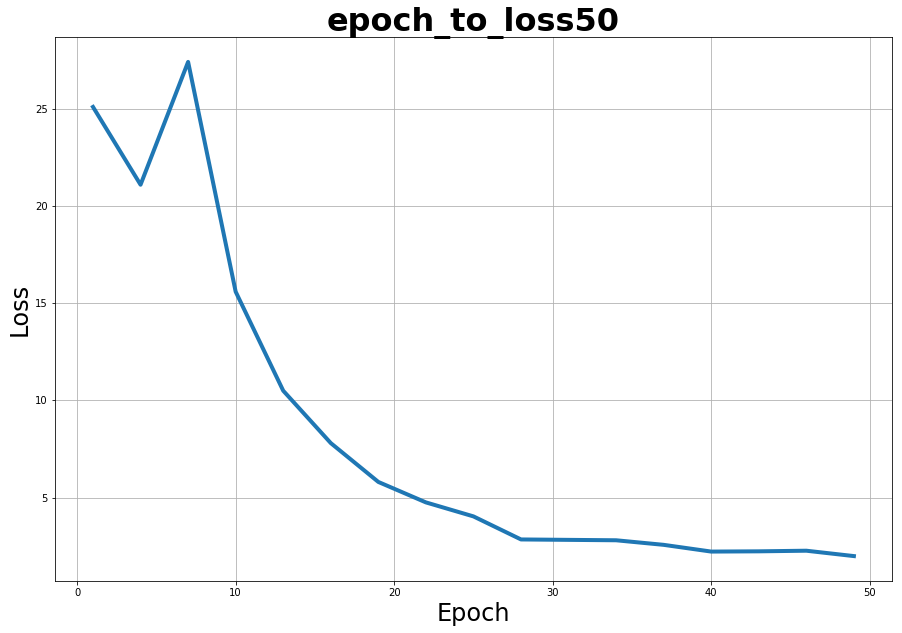

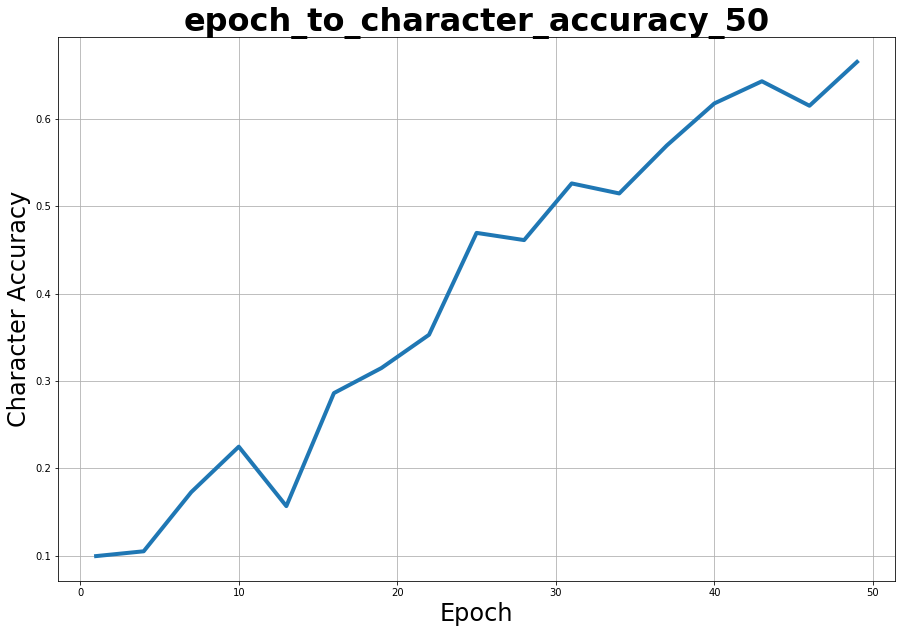

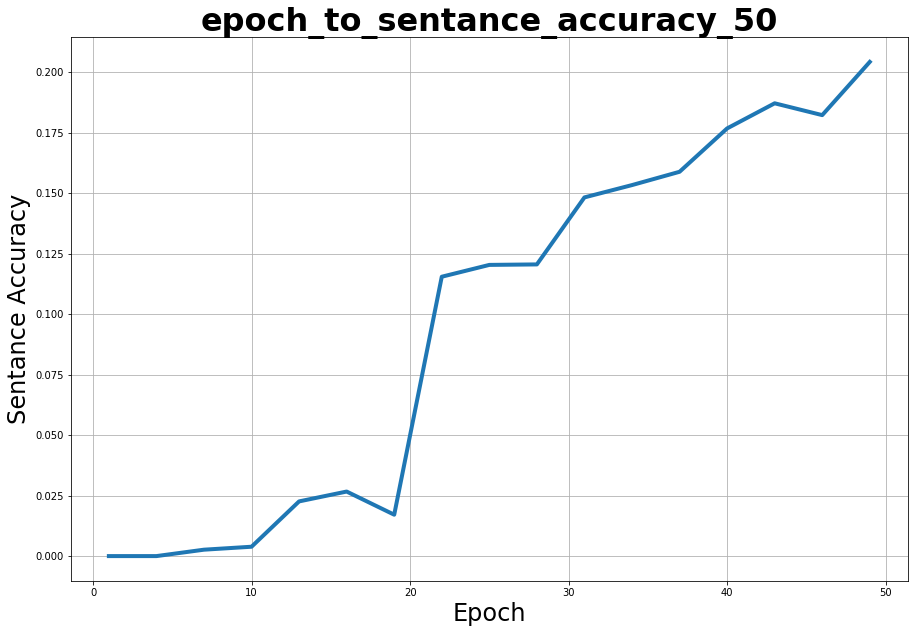

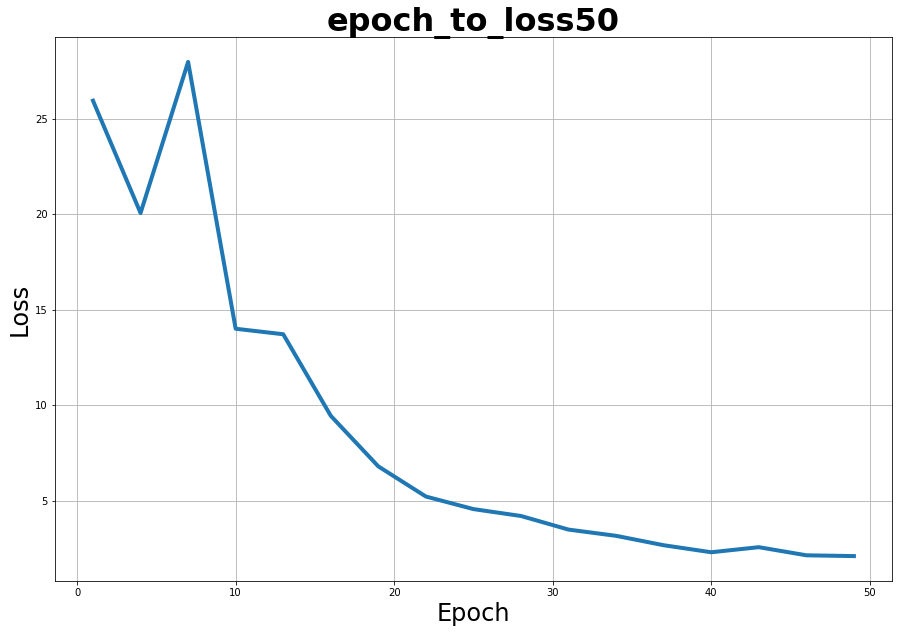

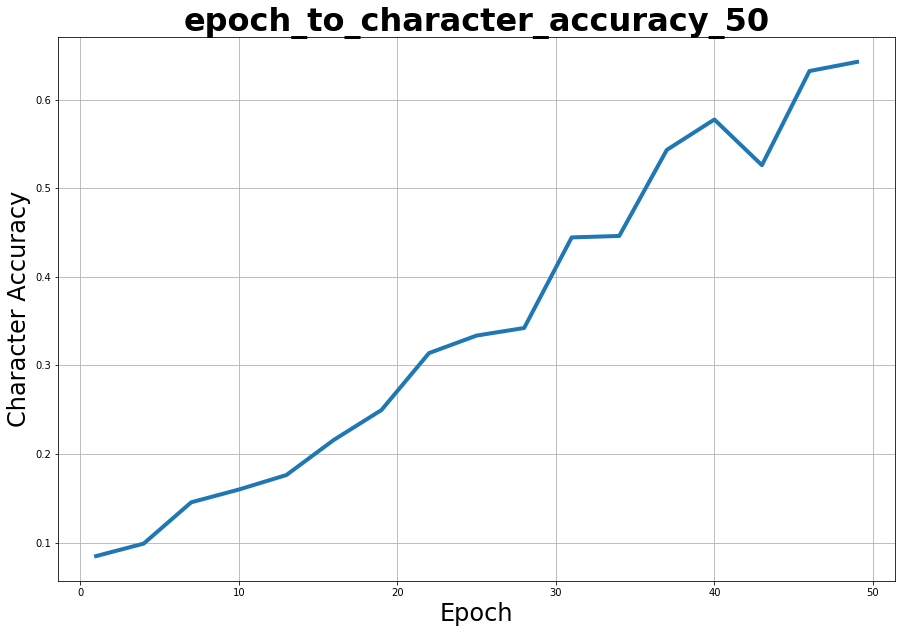

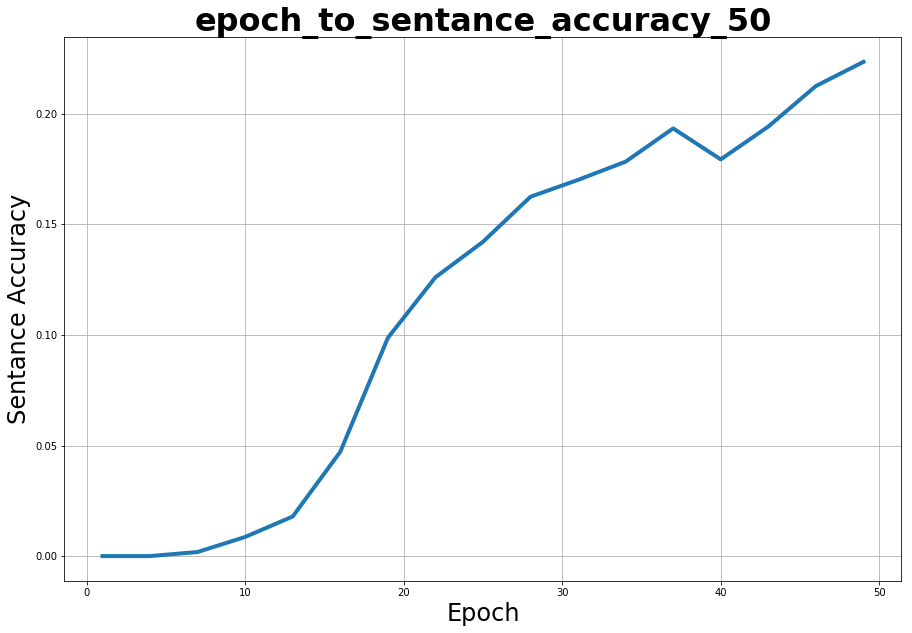

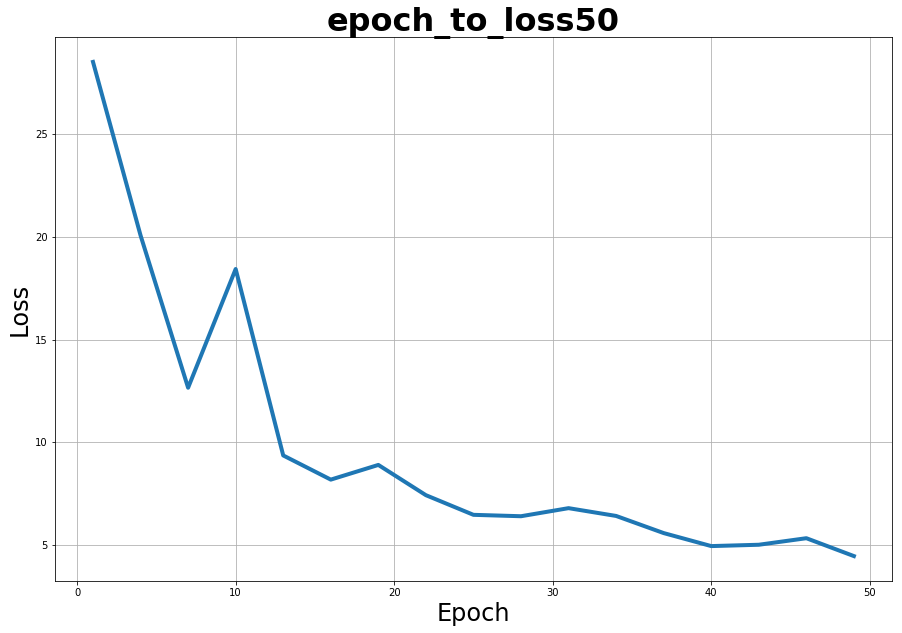

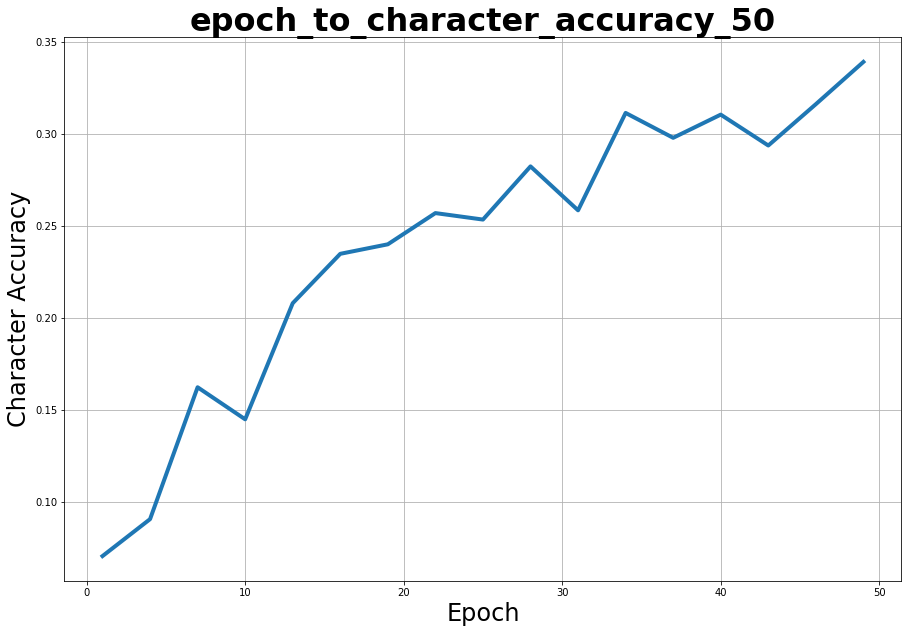

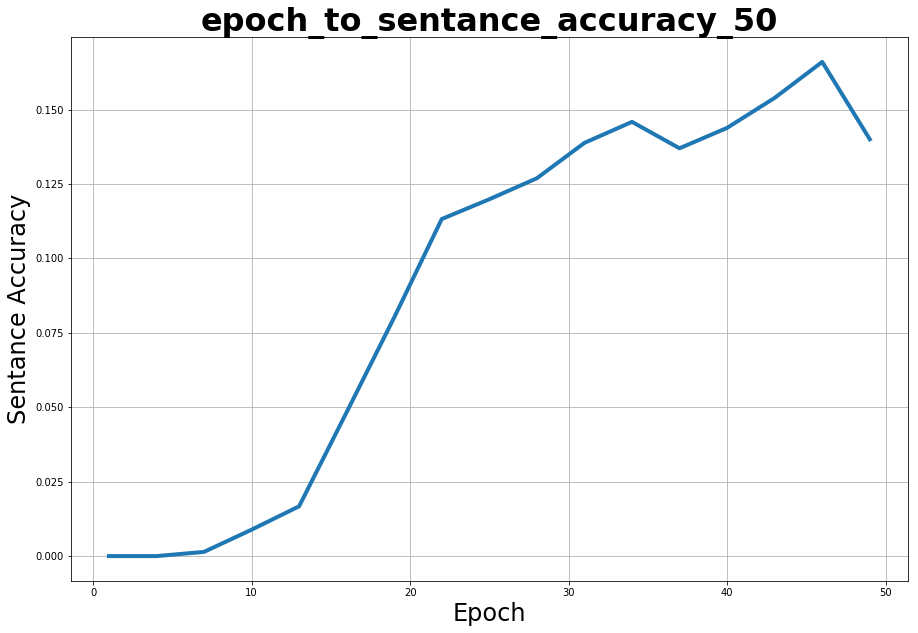

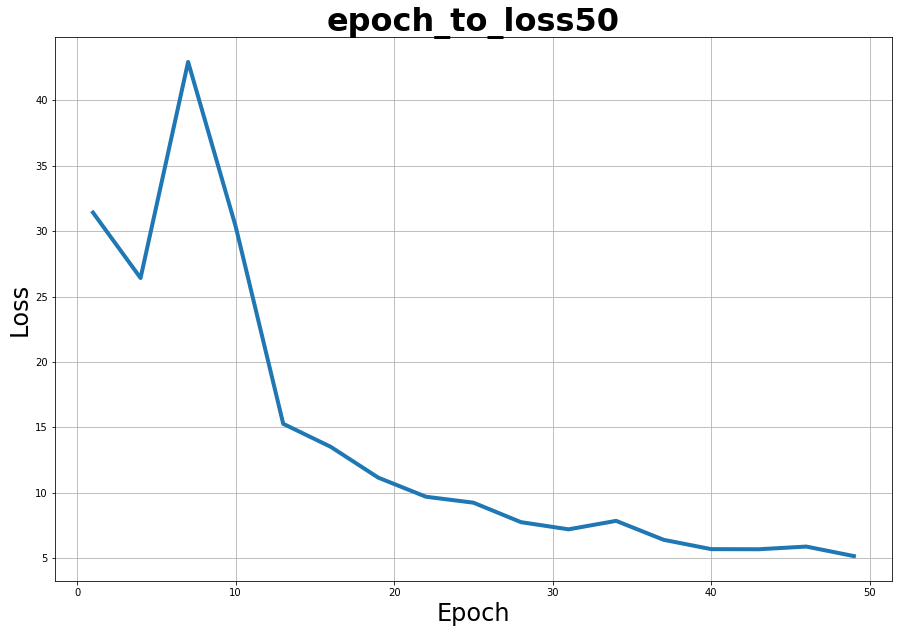

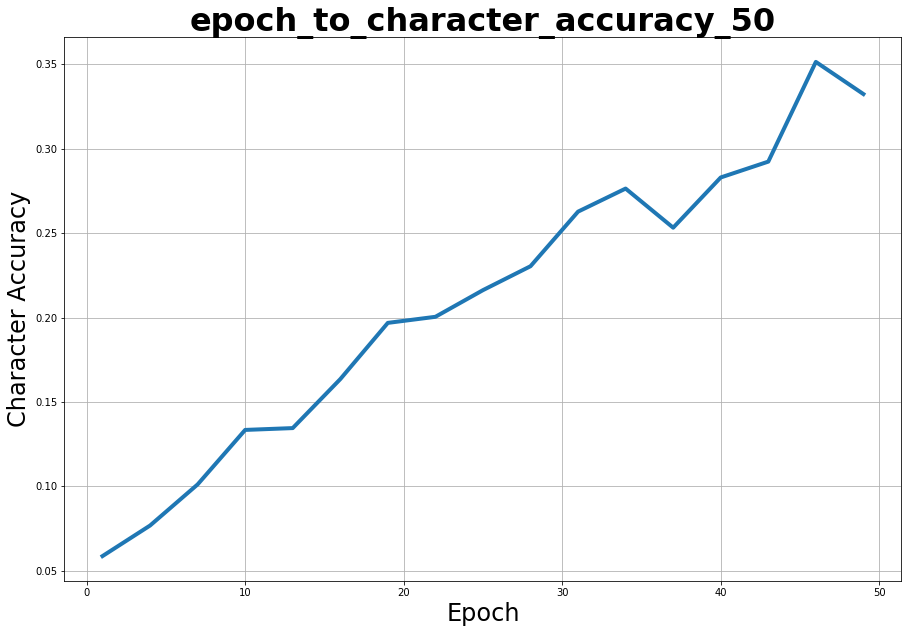

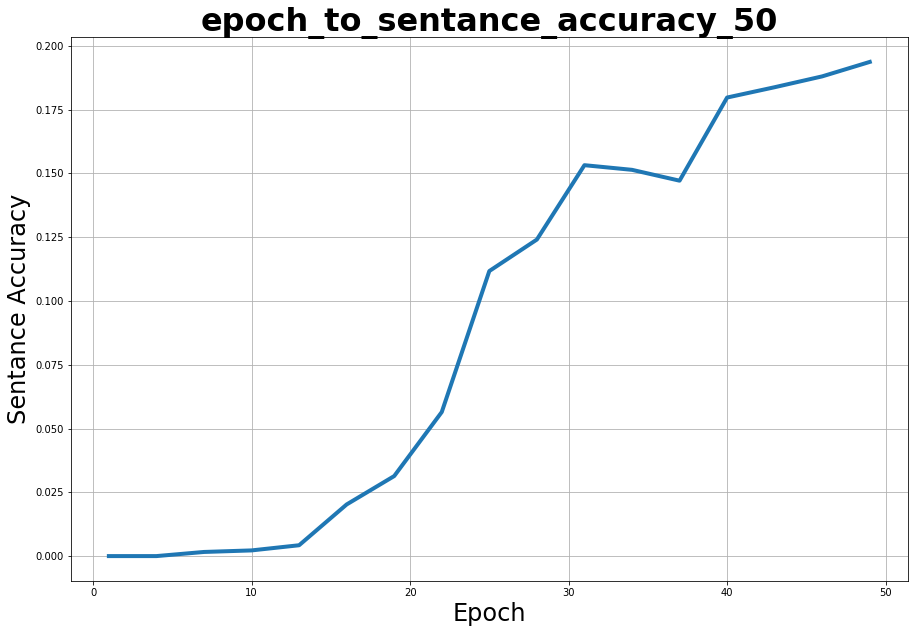

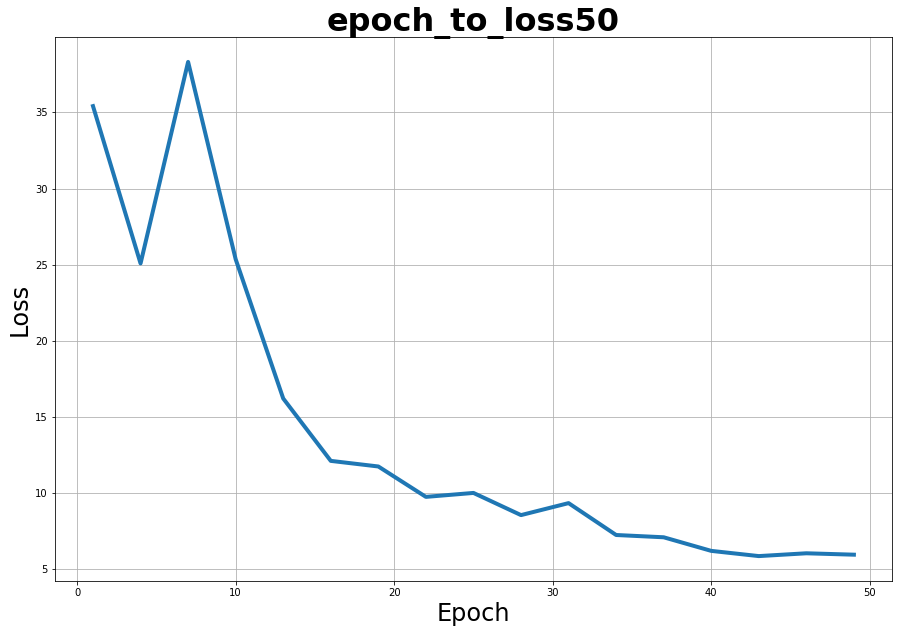

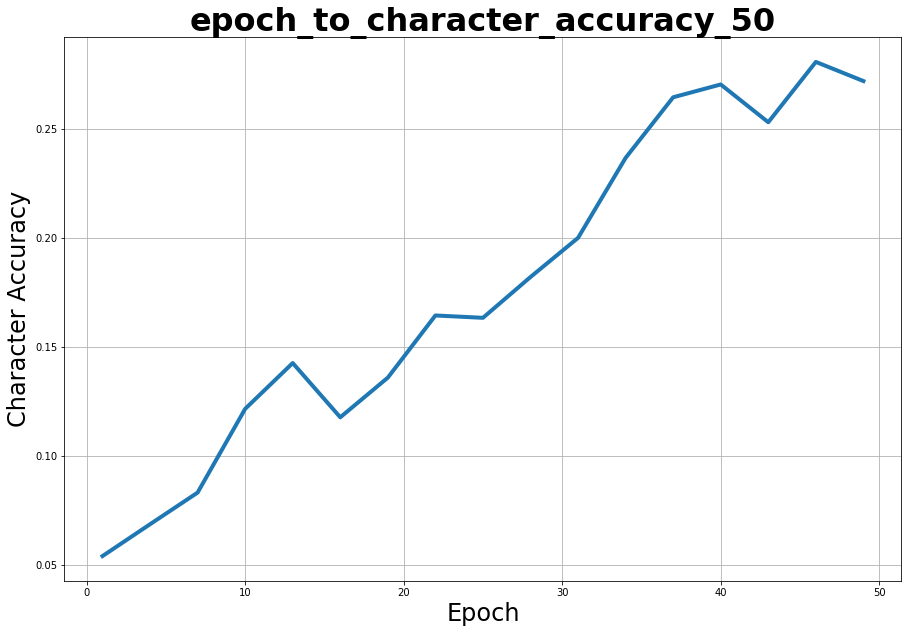

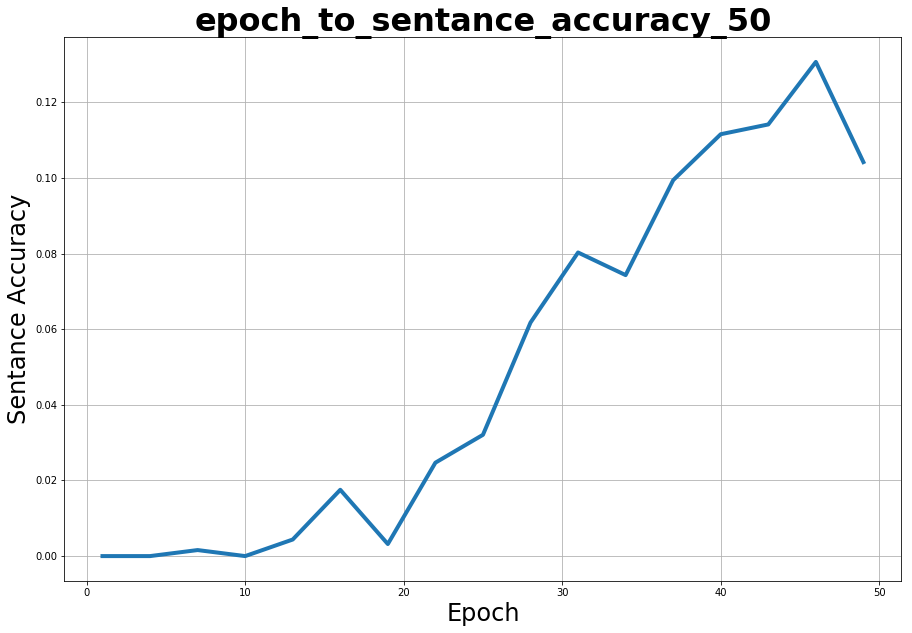

In [4]:
for i in N:
    print("N : %d" % i)
    train_path = "data/bracket_dedup/Length/N" + str(i) + "_data_train.txt"
    dev_path = "data/bracket_dedup/Length/N" + str(i) + "_data_test.txt"

    src = fields.SourceField()
    tgt = fields.TargetField()
    max_len = 204
    def len_filter(example):
        return len(example.src) <= max_len and len(example.tgt) <= max_len
    train = torchtext.data.TabularDataset(
        path=train_path, format='tsv',
        fields=[('src', src), ('tgt', tgt)],
        filter_pred=len_filter
    )
    dev = torchtext.data.TabularDataset(
        path=dev_path, format='tsv',
        fields=[('src', src), ('tgt', tgt)],
        filter_pred=len_filter
    )
    src.build_vocab(train)
    tgt.build_vocab(train)
    input_vocab = src.vocab
    output_vocab = tgt.vocab

    weight = torch.ones(len(tgt.vocab))
    pad = tgt.vocab.stoi[tgt.pad_token]
    loss = Perplexity(weight, pad)
    if torch.cuda.is_available():
        loss.cuda()
    
    optimizer = "Adam"
    hidden_size = 50
    bidirectional = True

    seq2seq = None
    encoder = EncoderRNN(len(src.vocab), max_len, hidden_size,
                         bidirectional=bidirectional, variable_lengths=True)
    decoder = DecoderRNN(len(tgt.vocab), max_len, hidden_size * 2 if bidirectional else hidden_size,
                         dropout_p=0.2, use_attention="Luong", bidirectional=bidirectional,
                         eos_id=tgt.eos_id, sos_id=tgt.sos_id)
    seq2seq = Seq2seq(encoder, decoder)
    if torch.cuda.is_available():
        seq2seq.cuda()

    for param in seq2seq.parameters():
        param.data.uniform_(-0.08, 0.08)

    # train
    t = SupervisedTrainer(loss=loss, batch_size=32,
                          checkpoint_every=50,
                          print_every=100,
                          hidden_size=hidden_size,
                          path="length_to_error_rate/dedup_N" + str(i))

    seq2seq, ave_loss, character_accuracy_list, sentance_accuracy_list = t.train(seq2seq, train,
                                                                             num_epochs=50, dev_data=dev,
                                                                             optimizer=optimizer,
                                                                             teacher_forcing_ratio=0.5)

    best_character_accuracy = 0
    best_sentance_accuracy = 0
    for i,j in zip(character_accuracy_list, sentance_accuracy_list):
        if best_character_accuracy < i:
            best_character_accuracy = i
        if best_sentance_accuracy < j:
            best_sentance_accuracy = j

    character_error_rate.append(1 - best_character_accuracy)
    sentance_error_rate.append(1 - best_sentance_accuracy)
    
    torch.save(seq2seq.state_dict(), 'log/pth/dedup_N' + str(i) + '_model_save.pth')

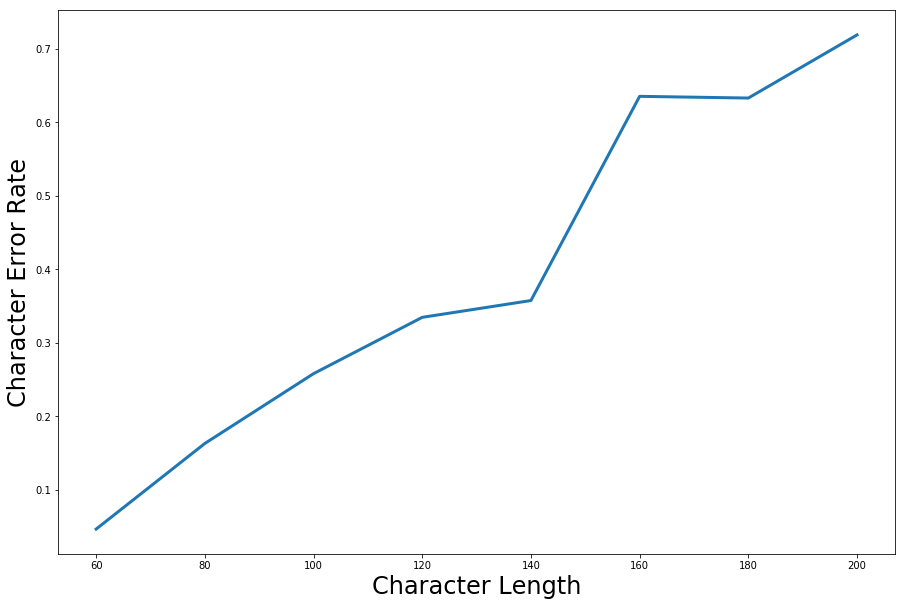

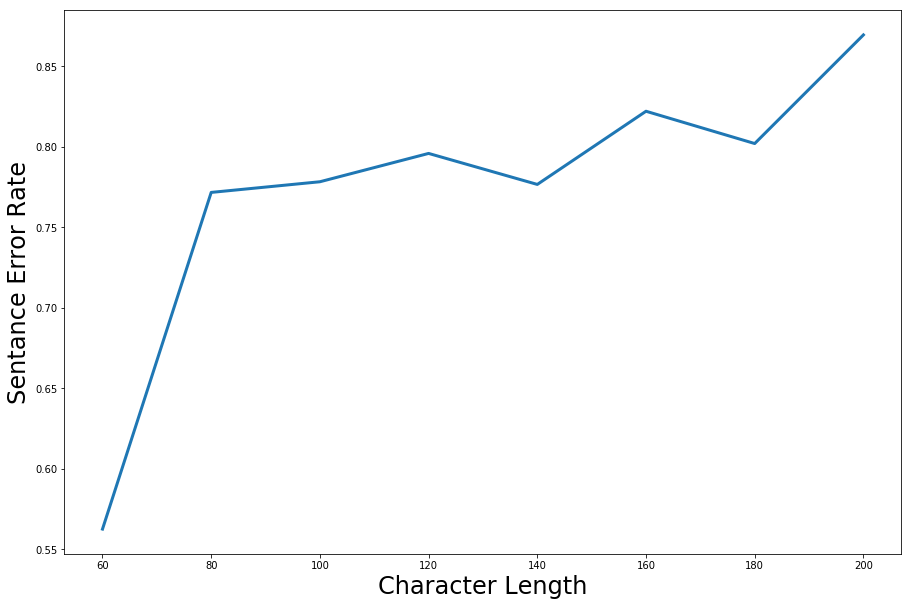

In [6]:
plt.figure(figsize=(15,10))
plt.plot(N, character_error_rate, LineWidth=3)
plt.xlabel('Character Length', fontsize=24)
plt.ylabel('Character Error Rate', fontsize=24)
plt.savefig('log/plot/length_to_error_rate/bracket_dedup_length_to_character_error_rate.png')

plt.figure(figsize=(15,10))
plt.plot(N, sentance_error_rate, LineWidth=3)
plt.xlabel('Character Length', fontsize=24)
plt.ylabel('Sentance Error Rate', fontsize=24)
plt.savefig('log/plot/length_to_error_rate/bracket_dedup_length_to_sentance_error_rate.png')

In [7]:
print(character_error_rate)
print(sentance_error_rate)

[0.04608284981783839, 0.162693586966151, 0.25778723574845663, 0.334493781142677, 0.35738133361885616, 0.6355066671202123, 0.6331767802265595, 0.7191737746833181]
[0.562430447362564, 0.771513353115727, 0.7781302876480541, 0.7957230142566192, 0.776473011948908, 0.821917808219178, 0.8018619712608783, 0.8693227091633466]
